In [1]:
import joblib
import pandas as pd
from os import listdir
from os.path import isfile, join
import numpy as np
import scipy.stats as st
import random
import sys  
sys.path.append("../time_series") 
from time_series import TimeSeries
import matplotlib.pyplot as plt


In [2]:
anomaly_detection_methods = ["anomalous", "fb", "glim", "hstree", "htm", "matrix_profile", "pbad", "sarimax", "stl", "twitter", "vae", "windowed_gaussian"]
characteristics = ["seasonality", "trend", "conceptdrift", "missing"]


dataset_list = []
time_list = []
adm_list = []
already_done = []

for method_y in anomaly_detection_methods:
    for characteristic_x in characteristics:
        point_f_scores = []
        windowed_f_scores = []
        nab_scores = []
        auc_scores = []
        characteristic_path = "../datasets_" + characteristic_x + "/"
        for characteristic_dataset_z in listdir(characteristic_path):

            ts = joblib.load("../jair_work_step_one_determine_characteristics/" + characteristic_dataset_z[:-4] + "_ts_object")
            true_outliers = []
            for item in ts.dataframe["outlier"].values:
                if item != item:
                    true_outliers.append(0)
                else:
                    true_outliers.append(item)


            if method_y == "fb":
                roc_auc_best_path = "prophet_roc_auc_best/"
            else:
                roc_auc_best_path = method_y + "_roc_auc_best/"
            for roc_auc_best_dict in listdir(roc_auc_best_path):
                if characteristic_dataset_z in roc_auc_best_dict:


                    youden_path = "dataset_youden_thresholds/"

                    if method_y == "anomalous":
                        youden_threshold_method_string = "Anomalous"
                    elif method_y == "fb":
                        youden_threshold_method_string = "Prophet"
                    elif method_y == "glim":
                        youden_threshold_method_string = "GLiM"
                    elif method_y == "hstree":
                        youden_threshold_method_string = "HS Tree"
                    elif method_y == "htm":
                        youden_threshold_method_string = "HTM"
                    elif method_y == "matrix_profile":
                        youden_threshold_method_string = "Matrix Profile"
                    elif method_y == "pbad":
                        youden_threshold_method_string = "PBAD"
                    elif method_y == "sarimax":
                        youden_threshold_method_string = "SARIMAX"
                    elif method_y == "stl":
                        youden_threshold_method_string = "STL"
                    elif method_y == "twitter":
                        youden_threshold_method_string = "Twitter"
                    elif method_y == "vae":
                        youden_threshold_method_string = "VAE"
                    elif method_y == "windowed_gaussian":
                        youden_threshold_method_string = "Windowed Gaussian"
                    else:
                        raise ValueError("Key Error")


                    threshold_zy = joblib.load(youden_path + characteristic_dataset_z + "_youden_thresholds")[youden_threshold_method_string]

                    # print("Anomaly Detection Method: ", method_y)
                    # print("Time Series Characteristic: ", characteristic_x)
                    # print("Characteristic Dataset: ", characteristic_dataset_z) 
                    # print("The Maximum AUC from the dataset and method: ", auc_zy)
                    # print("Best Youden Threshold from ROC with max AUC for dataset using method: ", threshold_zy)
                    # print("\n")


                    mypath = "../jair_work_step_three_anomaly_detection/" + method_y + "_scores/"
                    a = roc_auc_best_dict.split("roc_auc_",1)[1]
                    b = a.split("_",1)[1]
                    i=0
                    for f in listdir(mypath):
                        if b in f:
                            if "_" + str(i) + "_" in f:
                                time = joblib.load("../jair_work_step_three_anomaly_detection/" + method_y + "_scores/" + f)["Time"]
                                
                                if (characteristic_dataset_z, method_y) not in already_done:
                                
                                    dataset_list.append(characteristic_dataset_z)
                                    adm_list.append(method_y)
                                    time_list.append(time)
                                
                                already_done.append((characteristic_dataset_z, method_y))
                                
                                
time_df = pd.DataFrame({"Anomaly Detection Method": adm_list, "Dataset": dataset_list, "Time": time_list})
display(time_df)

,Anomaly Detection Method,Dataset,Time
0,anomalous,Twitter_volume_FB_filled.csv,418.552100
1,anomalous,elb_request_count_8c0756_filled.csv,101.260262
2,anomalous,FARM_filled.csv,102.439051
3,anomalous,ambient_temperature_system_failure_filled.csv,189.058260
4,anomalous,international-airline-passengers_filled.csv,5.941610
...,...,...,...
296,windowed_gaussian,art_daily_nojump_filled.csv,0.187934
297,windowed_gaussian,ibm-common-stock-closing-prices_filled.csv,0.025246
298,windowed_gaussian,rds_cpu_utilization_cc0c53_filled.csv,0.031651
299,windowed_gaussian,rds_cpu_utilization_e47b3b_filled.csv,0.025525


Picture:  1
Picture:  2
Picture:  3
Picture:  4
Group #:  0


Picture:  1
Picture:  2
Picture:  3
Picture:  4
Group #:  1


Picture:  1
Picture:  2
Picture:  3
Picture:  4
Group #:  2


Picture:  1
Picture:  2
Picture:  3
Picture:  4
Group #:  3


Picture:  1
Picture:  2
Picture:  3
Picture:  4
Group #:  4


Picture:  1
Picture:  2
Picture:  3
Picture:  4
Group #:  5


Picture:  1
Picture:  2
Picture:  3
Picture:  4
Group #:  6


Picture:  1
Group #:  7


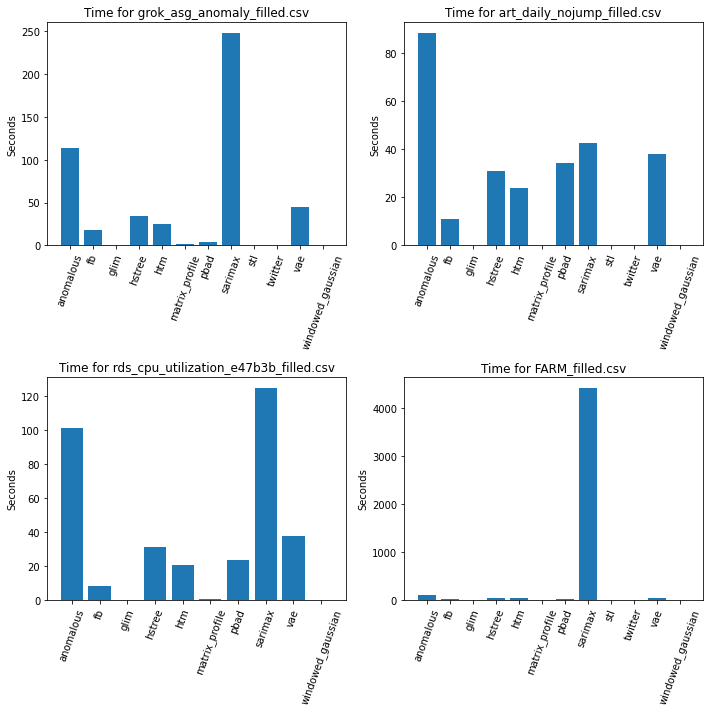

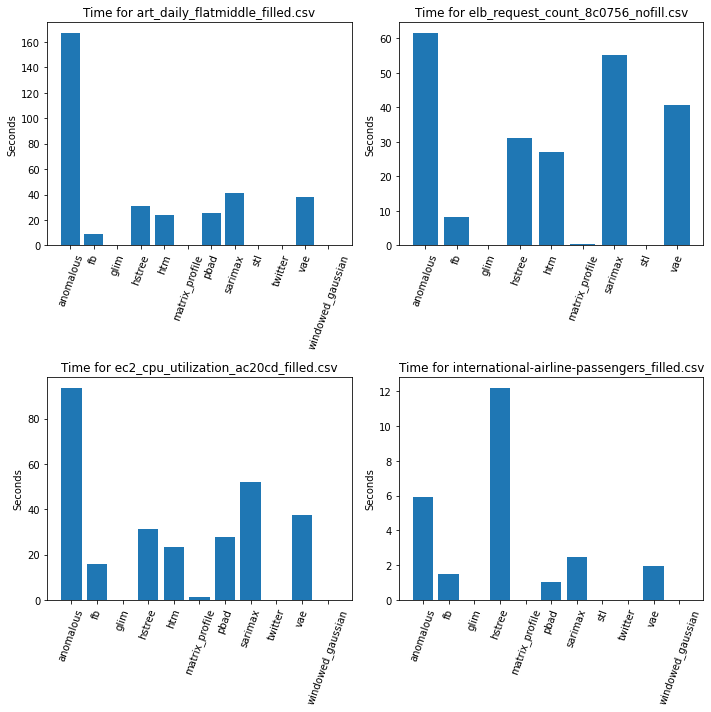

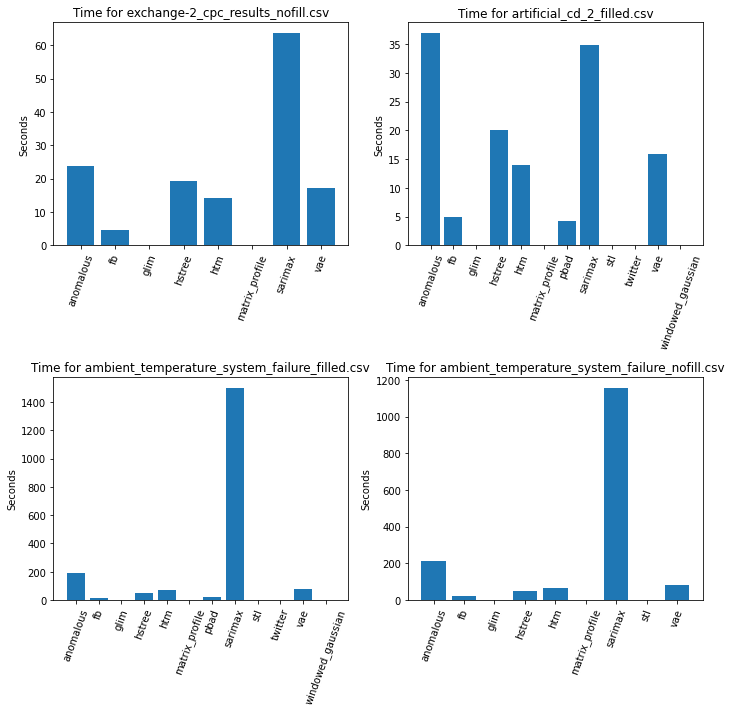

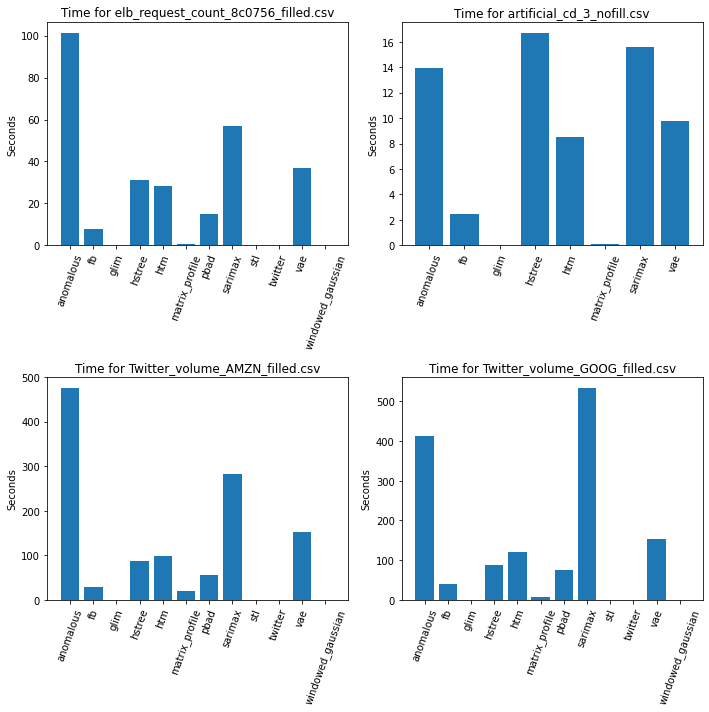

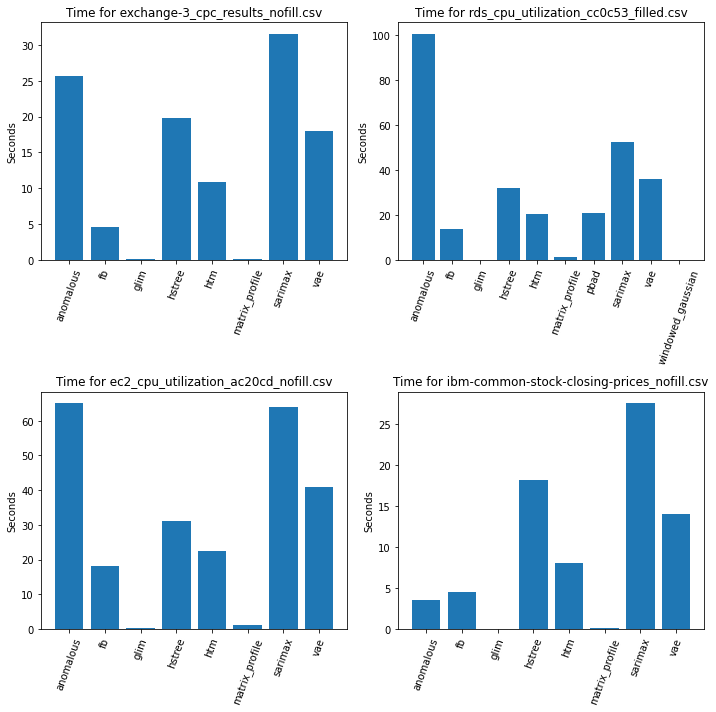

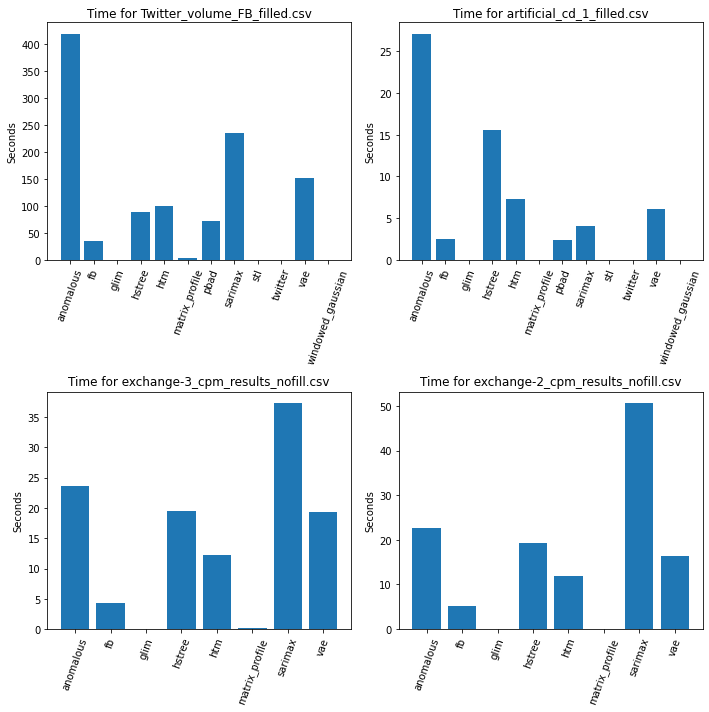

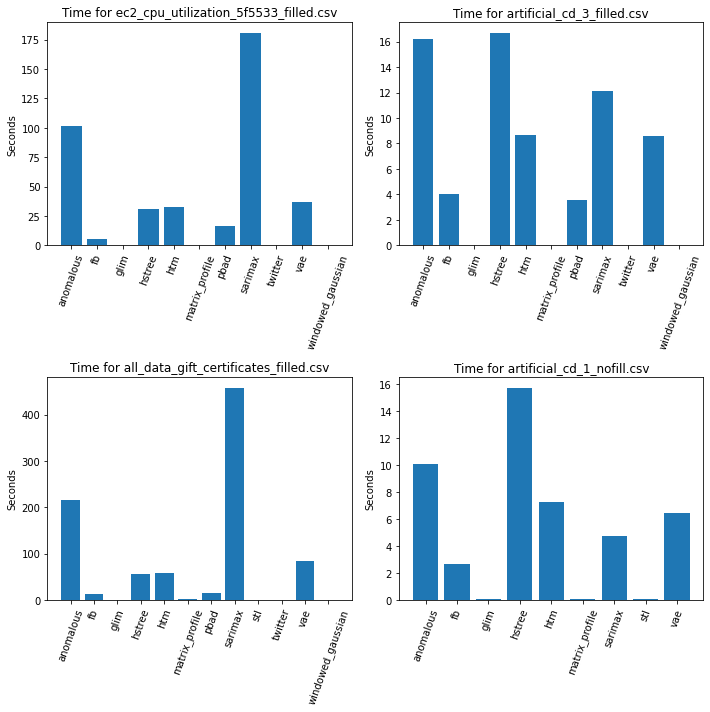

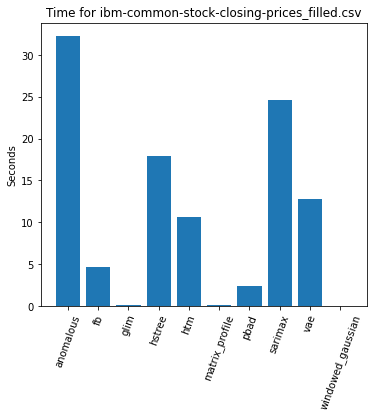

In [3]:
fig = plt.figure(figsize=(10,10))

count = 0
group = 0

dataset_set = list(set(time_df["Dataset"].values))
for dataset in dataset_set:

    narrow_methods = time_df[time_df["Dataset"] == dataset]["Anomaly Detection Method"].values
    narrow_times = time_df[time_df["Dataset"] == dataset]["Time"].values

    
    
    
    if count % 4 == 0:

        ax = fig.add_subplot(2,2,1)
        last = 1
        print("Picture: ", last)

    elif count % 4 == 1:

        ax = fig.add_subplot(2,2,2)
        last = 2
        print("Picture: ", last)

    elif count % 4 == 2:

        ax = fig.add_subplot(2,2,3)
        last = 3
        print("Picture: ", last)

    elif count % 4 == 3:

        ax = fig.add_subplot(2,2,4)
        last = 4
        print("Picture: ", last)

    else:

        print("ERROR")
    
    
    
    plt.bar(range(len(narrow_times)), narrow_times)
    plt.xticks(range(len(narrow_methods)), narrow_methods)
    plt.xticks(rotation=70)
    plt.title("Time for " + dataset)
    plt.ylabel("Seconds")
    
    
    
    
    
    
    
    
    if count % 4 == 3:

        fig.tight_layout()

        # plt.gcf().subplots_adjust(bottom=0.05)
        # plt.gcf().subplots_adjust(left=0.02)

        print("Group #: ", group)
        print("\n")
        fig.savefig("Times_group_" + str(group) + ".eps", format="eps")
        # plt.show()

        fig = plt.figure(figsize=(10,10))
        group += 1

    else:
        if group == 7:

            fig.tight_layout()

            # plt.gcf().subplots_adjust(bottom=0.05)
            # plt.gcf().subplots_adjust(left=0.02)

            print("Group #: ", group)
            fig.savefig("Times_group_7.eps", format="eps")
            # plt.show()
    
    count += 1



    
    
